In [1]:
import sys
import os
sys.path.append("../../src")
sys.path.append("../../data")
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython import display
import pylab as pl

from CorInfoMaxBSS import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Sparse_Dictionary_Learning'

In [2]:
image_paths = '../../data/Olshaussen'
X = scipy.io.loadmat(os.path.join(image_paths,'imagepatcheselfwhitened.mat'))['imagepatches']

In [3]:
# INPUT_STD = 0.5
# for MixtureIndex in range(X.shape[0]):
#     stdx = np.std(X[MixtureIndex,:])
#     X[MixtureIndex,:] = X[MixtureIndex,:]/stdx*INPUT_STD

In [4]:
lambday = 1 - 1e-4 / 5
lambdae = 1 - 1e-4 / 5
s_dim = 144
x_dim = 144

# Inverse output covariance
By = 5 * np.eye(s_dim)
# Inverse error covariance
Be = 15000 * np.eye(s_dim)

debug_iteration_point = 1000
model = OnlineCorInfoMaxOlshaussen(
    s_dim=s_dim,
    x_dim=x_dim,
    muW= 1e-3/3,
    lambday=lambday,
    lambdae=lambdae,
    By=By,
    Be=Be,
    neural_OUTPUT_COMP_TOL=1e-6,
    set_ground_truth=False,
)

In [5]:
# Wf = model.compute_overall_mapping(return_mapping = True)
# model.plot_receptive_fields(Wf)

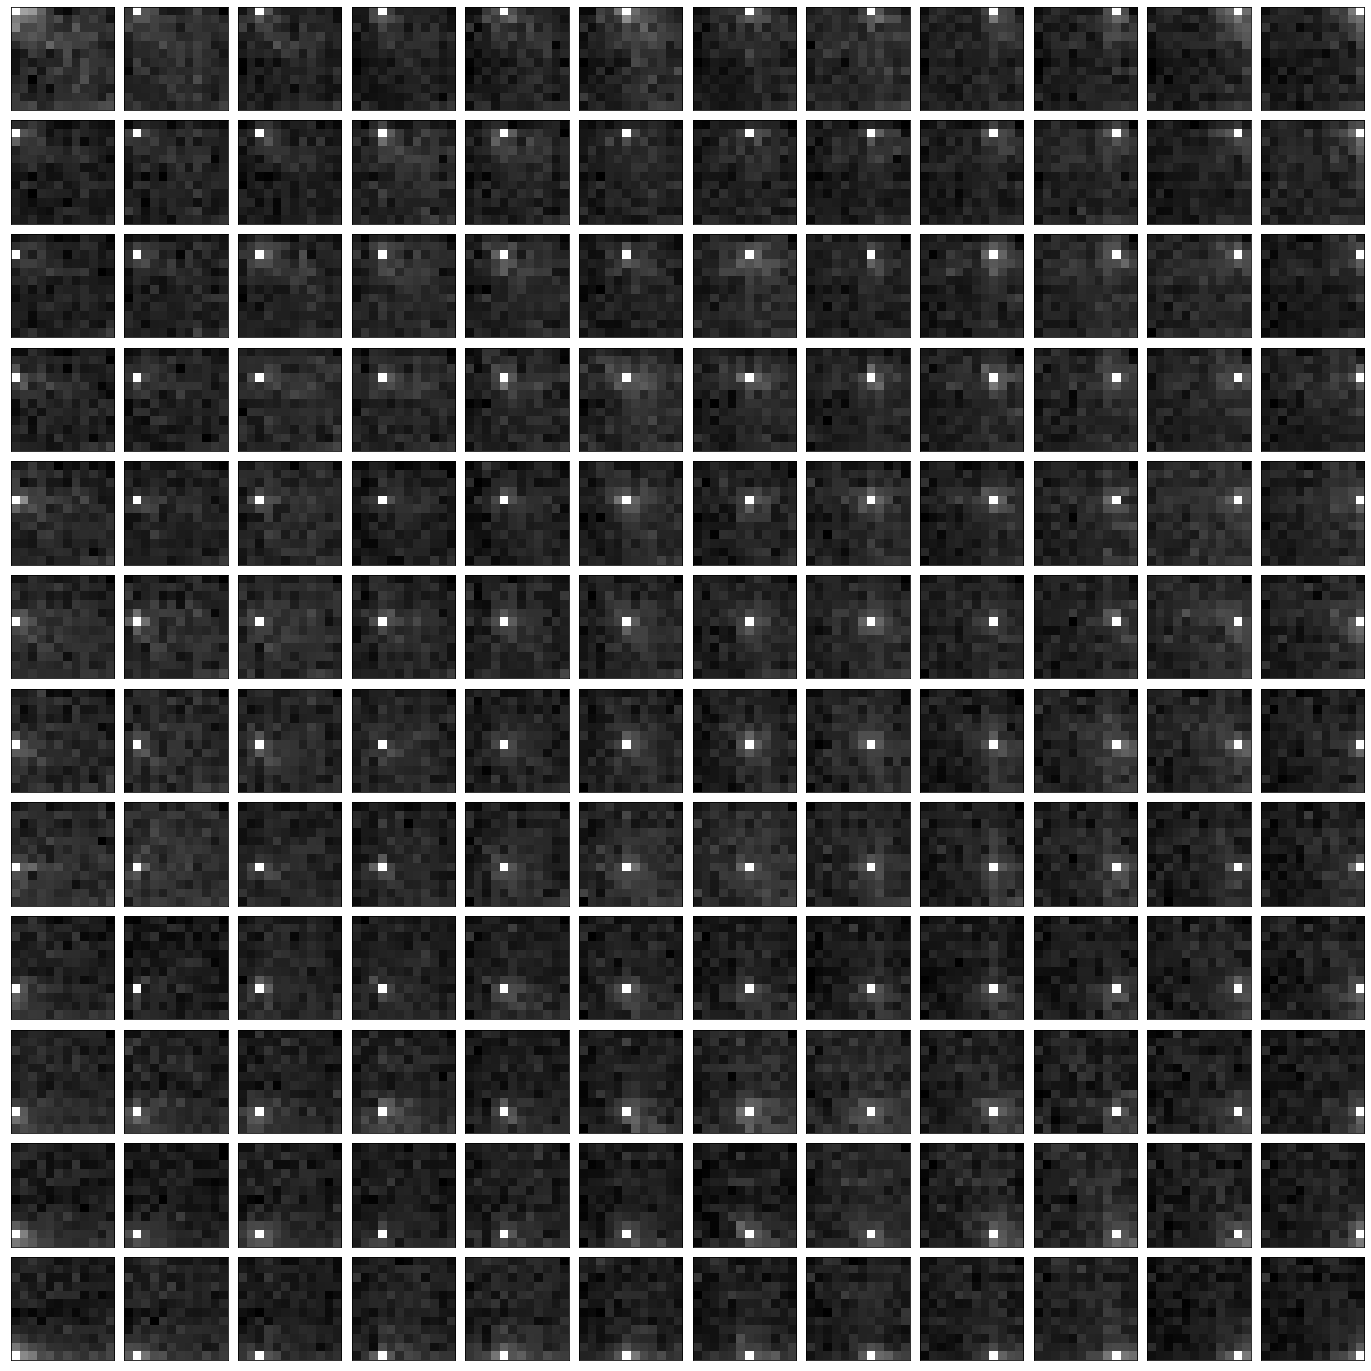

 74%|███████▍  | 232437/312500 [1:05:54<05:41, 234.62it/s] 

In [ ]:
model.fit_batch(
        X,
        n_epochs=1,
        case = "nnsparse", # options: 'sparse' or 'nnsparse'
        neural_dynamic_iterations=500,
        neural_lr_start=1.5,
        neural_lr_stop=1e-6,
        stlambd_lr=0.05,
        synaptic_lr_rule="constant",
        synaptic_lr_decay_divider=5000,
        neural_loop_lr_rule="divide_by_slow_loop_index",
        neural_lr_decay_multiplier=0.05,
        use_error_corr_structured_connectivity=False,
        shuffle=True,
        debug_iteration_point=debug_iteration_point,
        plot_in_jupyter=True,
    )

In [ ]:
yke = np.dot(W, x)

In [ ]:
Wfend = model.compute_overall_mapping(return_mapping = True)
yke = np.dot(Wfend, X[:,0])
yke.shape

In [ ]:
W = model.W
By = model.By
Be = model.Be

In [ ]:
Be

In [ ]:
# fig, ax = plt.subplots(12,12, figsize = (20,20))
# for l in range(144):
#     rf = np.reshape(-Wf[l,:], (12,12))
#     rf = ZeroOneNormalizeData(rf)
#     ax[l//12, l%12].imshow(rf, cmap = 'gray')

In [ ]:
fig, ax = plt.subplots(12,12, figsize = (20,20))
for l in range(144):
    rf = np.reshape(-Wfend[l,:], (12,12))
    rf = ZeroOneNormalizeData(rf)
    ax[l//12, l%12].imshow(rf, cmap = 'gray')
    
plt.savefig("NNSparseCopy1.png")